### Building Chatbot with multiple tools using LangGraph

## Aim
Create a chatbot with multiple tool capabilities from Arxiv, Wiki search and some custom functions

In [2]:
from langchain_community.tools import ArxivQueryRun, WikipediaQueryRun
from langchain_community.utilities import ArxivAPIWrapper, WikipediaAPIWrapper

In [4]:
arxiv_wrapper = ArxivAPIWrapper(top_k_results=2, doc_content_chars_max=500)
arxiv = ArxivQueryRun(api_wrapper=arxiv_wrapper)

wiki_wrapper = WikipediaAPIWrapper(top_k_results=2, doc_content_chars_max=500)
wikipedia = WikipediaQueryRun(api_wrapper=wiki_wrapper)

In [5]:
import os
from dotenv import load_dotenv

load_dotenv()

True

In [9]:
TAVILY_API_KEY = os.getenv("TAVILY_API_KEY")
GROQ_API_KEY = os.getenv("GROQ_API_KEY")

In [10]:
from langchain_community.tools.tavily_search import TavilySearchResults
tavily = TavilySearchResults()

C:\Users\rajpu\AppData\Local\Temp\ipykernel_23172\1535493036.py:2: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the `langchain-tavily package and should be used instead. To use it run `pip install -U `langchain-tavily` and import as `from `langchain_tavily import TavilySearch``.
  tavily = TavilySearchResults()


In [11]:
tavily.invoke("Can you provide me the latest AI news in the tech industry?")

[{'title': 'Top AI News for November 2025: Breakthroughs, Launches ...',
  'url': 'https://www.aiapps.com/blog/ai-news-november-2025-breakthroughs-launches-trends/',
  'content': "The flood of new AI product launches reflects the industry's rapid growth, offering exciting opportunities but also challenges for businesses navigating which tools will provide the most value. The rising demand for AI expertise and increasing investments in the field suggest this is just the beginning of a larger transformation. Companies that invest in AI now will be better equipped to adapt and thrive as the technology evolves. The focus should remain on adopting tools that address real [...] ## Conclusion: Key Points from November's AI News\n\nNovember 2025 brought a wave of advancements in AI, transforming both business operations and creative workflows. This month underscored a clear shift: AI tools are becoming easier to use, more powerful, and practical for a wide range of industries. [...] Aiapps.com

In [12]:
tools = [arxiv, wikipedia, tavily]

In [14]:
from langchain_groq import ChatGroq

llm=ChatGroq(model="qwen/qwen3-32b", api_key=GROQ_API_KEY)
response = llm.invoke("Write a code for binary search in c++")

In [16]:
print(response.content)

<think>
Okay, I need to write a C++ code for binary search. Let me think about how binary search works. It's an efficient algorithm for finding an item in a sorted list. The idea is to repeatedly divide the search interval in half. 

First, I should start by including the necessary headers. Probably <iostream> for input output, and maybe <vector> if I want to use a vector instead of an array. Wait, the user didn't specify, but I can choose. Let's go with a regular array for simplicity.

Then, the function. Binary search can be implemented iteratively or recursively. Which is better? Well, the iterative approach is usually preferred for arrays since it's O(log n) time and O(1) space, whereas recursion would have the same time but still use O(log n) space due to the call stack. So maybe iterative is better here.

The function parameters: it needs the array, the target value, and the size. Wait, in C++, arrays decay into pointers, so when passing an array to a function, we lose the size i

In [17]:
llm_with_tools = llm.bind_tools(tools)
llm_with_tools

RunnableBinding(bound=ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x0000023595EAEC00>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x0000023595E756A0>, model_name='qwen/qwen3-32b', model_kwargs={}, groq_api_key=SecretStr('**********')), kwargs={'tools': [{'type': 'function', 'function': {'name': 'arxiv', 'description': 'A wrapper around Arxiv.org Useful for when you need to answer questions about Physics, Mathematics, Computer Science, Quantitative Biology, Quantitative Finance, Statistics, Electrical Engineering, and Economics from scientific articles on arxiv.org. Input should be a search query.', 'parameters': {'properties': {'query': {'description': 'search query to look up', 'type': 'string'}}, 'required': ['query'], 'type': 'object'}}}, {'type': 'function', 'function': {'name': 'wikipedia', 'description': 'A wrapper around Wikipedia. Useful for when you need to answer general questions about people, places, companies, facts,

In [18]:
from langchain_core.messages import HumanMessage, AIMessage
from pprint import pprint

response = llm_with_tools.invoke([HumanMessage(content=f"what is the recent AI news?")])

In [24]:
print(response)

content='' additional_kwargs={'reasoning_content': 'Okay, the user is asking about recent AI news. I need to figure out which tool to use here. Let me check the available functions. There\'s arxiv, wikipedia, and tavily_search_results_json. \n\nArxiv is for scientific papers, which might be too technical and not the best for general news. Wikipedia is good for general knowledge but might not have the latest updates. The user mentioned "recent" news, so they probably want the most up-to-date information. Tavily_search_results_json is described as a search engine optimized for current events. That sounds like the right choice here.\n\nI should call tavily_search_results_json with the query "recent AI news" to get the latest information. Let me make sure the parameters are correct. The function requires a query, and I\'m providing "recent AI news" as the argument. That should work. I\'ll structure the tool call accordingly.\n', 'tool_calls': [{'id': 'jxnq3av50', 'function': {'arguments': 

In [21]:
print(response.additional_kwargs["reasoning_content"])

Okay, the user is asking about recent AI news. I need to figure out which tool to use here. Let me check the available functions. There's arxiv, wikipedia, and tavily_search_results_json. 

Arxiv is for scientific papers, which might be too technical and not the best for general news. Wikipedia is good for general knowledge but might not have the latest updates. The user mentioned "recent" news, so they probably want the most up-to-date information. Tavily_search_results_json is described as a search engine optimized for current events. That sounds like the right choice here.

I should call tavily_search_results_json with the query "recent AI news" to get the latest information. Let me make sure the parameters are correct. The function requires a query, and I'm providing "recent AI news" as the argument. That should work. I'll structure the tool call accordingly.



In [22]:
response.tool_calls

[{'name': 'tavily_search_results_json',
  'args': {'query': 'recent AI news'},
  'id': 'jxnq3av50',
  'type': 'tool_call'}]

In [23]:
response.response_metadata

{'token_usage': {'completion_tokens': 214,
  'prompt_tokens': 400,
  'total_tokens': 614,
  'completion_time': 0.733849016,
  'prompt_time': 0.017512535,
  'queue_time': 0.056361725,
  'total_time': 0.751361551,
  'completion_tokens_details': {'reasoning_tokens': 184}},
 'model_name': 'qwen/qwen3-32b',
 'system_fingerprint': 'fp_5cf921caa2',
 'service_tier': 'on_demand',
 'finish_reason': 'tool_calls',
 'logprobs': None,
 'model_provider': 'groq'}

In [25]:
## State Schema
from typing_extensions import TypedDict
from typing import Annotated
from langchain_core.messages import AnyMessage
from langgraph.graph.message import add_messages

class State(TypedDict):
    messages:Annotated[list[AnyMessage], add_messages]

In [27]:
### Entire Chatbot with Langgraph

from IPython.display import display, Image
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode, tools_condition

## Node Definition
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}

## Bulding Workflow

builder = StateGraph(State)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools=tools))

builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    tools_condition,
)

builder.add_edge("tools", END)

graph = builder.compile()

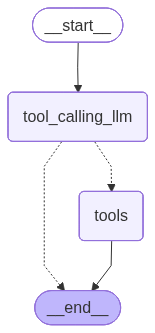

In [28]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [30]:
messages = graph.invoke({"messages":HumanMessage(content="What is attention is all you need?")})
for m in messages["messages"]:
    m.pretty_print()

================================ Human Message =================================

What is attention is all you need?
================================== Ai Message ==================================

The phrase "Attention is All You Need" refers to a groundbreaking 2017 research paper that introduced the **Transformer** model, a revolutionary architecture in machine learning for sequence-to-sequence tasks (e.g., language translation, text summarization). The key innovation was replacing traditional sequence-processing methods (like RNNs or CNNs) with a **self-attention mechanism**, enabling parallel processing of data and capturing long-range dependencies more effectively.

### Key Points:
1. **Core Idea**: The Transformer relies entirely on attention layers to weigh the importance of different parts of the input sequence dynamically.
2. **Impact**: It became the foundation for state-of-the-art models like BERT, GPT, and others, dominating NLP tasks since its release.
3. **Advantages**:

In [32]:
messages = graph.invoke({"messages":HumanMessage(content="Give me the top 10 recent AI news of November 2025")})
for m in messages["messages"]:
    m.pretty_print()

================================ Human Message =================================

Give me the top 10 recent AI news of November 2025
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (2wyz08c70)
 Call ID: 2wyz08c70
  Args:
    query: top 10 AI news November 2025
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "Top Tech News Today, November 10, 2025 - Tech Startups", "url": "https://techstartups.com/2025/11/10/top-tech-news-today-november-10-2025/", "content": "It’s Monday, November 10, 2025, and we’re back with your quick digest of the Top 10 Tech News Stories from the past 12 hours. From Apple’s secret billion-dollar AI deal with Google and OpenAI’s push into healthcare to the rise of orbital data centers and Norway’s green-hydrogen breakthrough, today’s tech landscape spans every frontier — earthbound and beyond. [...] ### Rumble to acq